Дан тренировочный датасет с текстами сообщений из мессенджера на английском языке. Для каждого из них проставлен флаг того, является ли сообщение СПАМом.

Так же дан тестовый датасет с такими же текстами сообщений, но без флага. На нем нужно будет проскорить модель и приложить результаты.
Данные лежат по ссылке

Поля датасета:\
text_уре - целевая переменная, флаг СПАМ/не СПАМ\
text - текст сообщения

# Exploratory data analysis

In [7]:
#Importing necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [8]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [20]:
#loading dataset

data = pd.read_csv("/content/drive/MyDrive/train_spam.csv")
test = pd.read_csv("/content/drive/MyDrive/test_spam.csv")

In [ ]:
data.head(5)

,text_type,text
0,ham,make sure alex knows his birthday is over in f...
1,ham,a resume for john lavorato thanks vince i will...
2,spam,plzz visit my website moviesgodml to get all m...
3,spam,urgent your mobile number has been awarded wit...
4,ham,overview of hr associates analyst project per ...


In [ ]:
test.head(3)

,text
0,j jim whitehead ejw cse ucsc edu writes j you ...
1,original message from bitbitch magnesium net p...
2,java for managers vince durasoft who just taug...


In [ ]:
data.shape

(16278, 2)

In [ ]:
#Checking for columns and their datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16278 entries, 0 to 16277
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text_type  16278 non-null  object
 1   text       16278 non-null  object
dtypes: object(2)
memory usage: 254.5+ KB


In [ ]:
#Checking missing values
data.isnull().sum()

text_type    0
text         0
dtype: int64

There is no missing data

#### Encoding

In [10]:
#Extracting non-numeric columns for encoding
cols_cat= data.select_dtypes(include='object').columns
cols_cat

Index(['text_type', 'text'], dtype='object')

In [11]:
#Applying Laber Encoder
le = LabelEncoder()
data[cols_cat] = data[cols_cat].apply(le.fit_transform)

In [12]:
data.head(3)

,text_type,text
0,0,8083
1,0,316
2,1,10508


In [13]:
#Splitting input and output columns
X = data.drop("text_type",axis=1)
y = data["text_type"]

In [14]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: text_type, dtype: int64

#### Scaling

In [15]:
#Scaling input column
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

#### Train Test Split

In [16]:
#train test split
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)

In [17]:
train_y.count()

11394

### Model building

In [18]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

def ML(model):
    print('Train Score: {}'.format(model.score(train_X, train_y)))
    print('Test Score: {}'.format(model.score(test_X, test_y)))
    print('\n')
    print('----------------------------')
    print('\n')

    pred_y =model.predict(test_X)

    #Confusion Matrix
    print('Confusion Matrix')
    print('\n')
    cm = confusion_matrix(pred_y, test_y)
    ConfusionMatrixDisplay(cm).plot()
    plt.show()
    print('\n')
    print('----------------------------')
    print('\n')

    #Classification Report
    print('Classification Report')
    print('\n')
    print(classification_report(pred_y, test_y))
    print('\n')
    print('----------------------------')
    print('\n')

    #Accuracy Score
    print('Accuracy Score')
    global accuracy
    print('\n')
    accuracy = round((accuracy_score(test_y,pred_y)),4)
    print("Test Accuracy of {}  : {}".format(model, accuracy))
    print('\n')
    print('----------------------------')
    print('\n')

    #Cross Validation Score
    print('Cross Validation Score')
    global Cross_val
    print('\n')
    Cross_val = round((cross_val_score(model, test_X,test_y, cv=5).mean()),4)
    print("Cross-Validation Accuracy Scores: ",Cross_val)
    print('\n')
    print('----------------------------')
    print('\n')

    # ROC curve and Area-Under-Curve (AUC)
    prec, rec, _ = precision_recall_curve(test_y, pred_y, pos_label=1)
    print('AUC SCORE: ', auc(rec, prec))


### Model 1 : Logistic Regresssion

In [ ]:
LR = LogisticRegression()
LR.fit(train_X, train_y)

LogisticRegression()

Train Score: 0.7037037037037037
Test Score: 0.7065929565929566


----------------------------


Confusion Matrix




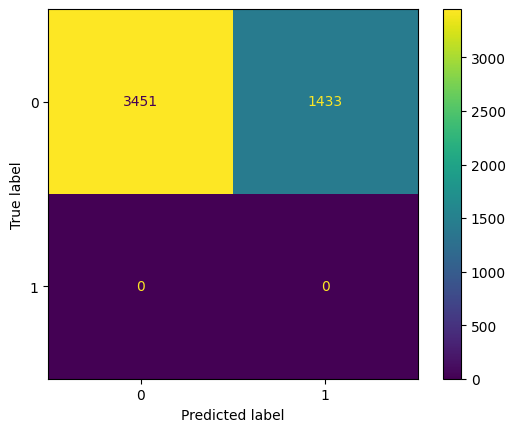



----------------------------


Classification Report


              precision    recall  f1-score   support

           0       1.00      0.71      0.83      4884
           1       0.00      0.00      0.00         0

    accuracy                           0.71      4884
   macro avg       0.50      0.35      0.41      4884
weighted avg       1.00      0.71      0.83      4884



----------------------------


Accuracy Score


Test Accuracy of LogisticRegression()  : 0.7066


----------------------------


Cross Validation Score


Cross-Validation Accuracy Scores:  0.7066


----------------------------


AUC SCORE:  0.6467035217035217


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
ML(LR)

### Logistic Regression model doesnt work very well with this data (because model is overfitted and predict allways 0), let us use Decision Tree

# Model 2 : Decision Tree

In [ ]:
# fit model on training data
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

preds = decision_tree.predict(test_X)
prec, rec, _ = precision_recall_curve(test_y, preds, pos_label=1)

print('AUC SCORE: ', auc(rec, prec))

AUC SCORE:  0.6873826579862867


Train Score: 1.0
Test Score: 0.7866502866502867


----------------------------


Confusion Matrix




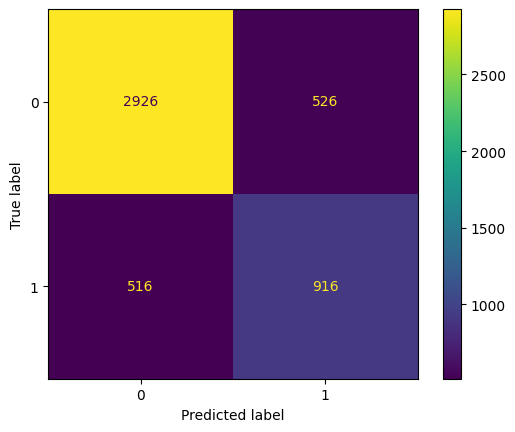



----------------------------


Classification Report


              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3452
           1       0.64      0.64      0.64      1432

    accuracy                           0.79      4884
   macro avg       0.74      0.74      0.74      4884
weighted avg       0.79      0.79      0.79      4884



----------------------------


Accuracy Score


Test Accuracy of DecisionTreeClassifier()  : 0.7867


----------------------------


Cross Validation Score


Cross-Validation Accuracy Scores:  0.7398


----------------------------


AUC SCORE:  0.6912961304944817


In [ ]:
ML(decision_tree)

# Model 3 : Gradient Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split


clf1 = HistGradientBoostingClassifier(max_depth=32)
clf1.fit(train_X, train_y)

preds = clf1.predict(test_X)
prec, rec, _ = precision_recall_curve(test_y, preds, pos_label=1)

print('AUC SCORE: ', auc(rec, prec))

AUC SCORE:  0.6158466743735191


Train Score: 0.7672459189046866
Test Score: 0.7616707616707616


----------------------------


Confusion Matrix




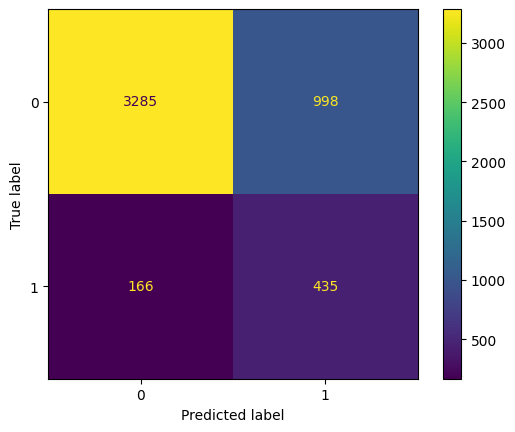



----------------------------


Classification Report


              precision    recall  f1-score   support

           0       0.95      0.77      0.85      4283
           1       0.30      0.72      0.43       601

    accuracy                           0.76      4884
   macro avg       0.63      0.75      0.64      4884
weighted avg       0.87      0.76      0.80      4884



----------------------------


Accuracy Score


Test Accuracy of HistGradientBoostingClassifier(max_depth=32)  : 0.7617


----------------------------


Cross Validation Score


Cross-Validation Accuracy Scores:  0.7523


----------------------------


AUC SCORE:  0.6158466743735191


In [ ]:
ML(clf1)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf2 = GradientBoostingClassifier(n_estimators=100, #try 300
								learning_rate=0.05,
								random_state=100,
								max_features=32 )
clf2.fit(train_X, train_y)

preds = clf2.predict(test_X)
prec, rec, _ = precision_recall_curve(test_y, preds, pos_label=1)

print('AUC SCORE: ', auc(rec, prec))

AUC SCORE:  0.6515818877123831


In [ ]:
clf3 = GradientBoostingClassifier(n_estimators=300, #try 300
								learning_rate=0.05,
								random_state=100,
								max_features=32 )
clf3.fit(train_X, train_y)

preds = clf3.predict(test_X)
prec, rec, _ = precision_recall_curve(test_y, preds, pos_label=1)

print('AUC SCORE: ', auc(rec, prec))

AUC SCORE:  0.6399324432661594


# Model 4: RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rndFrst = RandomForestClassifier(n_estimators=300, max_depth=7, random_state=0)
rndFrst.fit(train_X, train_y)
preds = rndFrst.predict(test_X)
prec, rec, _ = precision_recall_curve(test_y, preds, pos_label=1)

print('AUC SCORE: ', auc(rec, prec))

AUC SCORE:  0.6503616497791078


Train Score: 0.7482885729331227
Test Score: 0.7495904995904996


----------------------------


Confusion Matrix




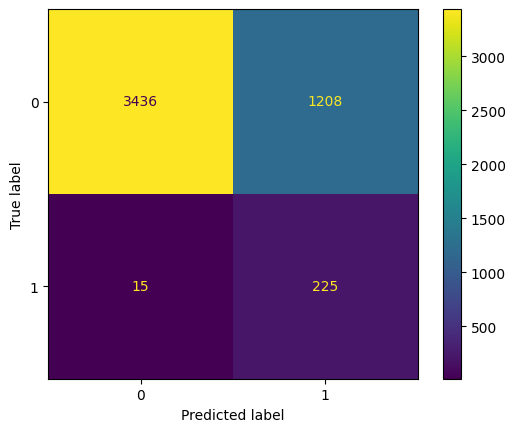



----------------------------


Classification Report


              precision    recall  f1-score   support

           0       1.00      0.74      0.85      4644
           1       0.16      0.94      0.27       240

    accuracy                           0.75      4884
   macro avg       0.58      0.84      0.56      4884
weighted avg       0.95      0.75      0.82      4884



----------------------------


Accuracy Score


Test Accuracy of RandomForestClassifier(max_depth=3, n_estimators=300, random_state=0)  : 0.7496


----------------------------


Cross Validation Score


Cross-Validation Accuracy Scores:  0.7453


----------------------------


AUC SCORE:  0.6709257531178328


In [ ]:
ML(rndFrst)

# Model 5: Neural net

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

NNClf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')
NNClf.fit(train_X, train_y)
preds = NNClf.predict(test_X)
prec, rec, _ = precision_recall_curve(test_y, preds, pos_label=1)

print('AUC SCORE: ', auc(rec, prec))

AUC SCORE:  0.5979895123276503


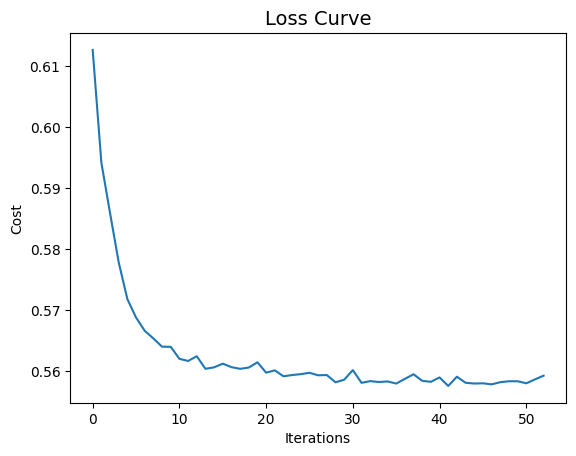

In [ ]:
plt.plot(NNClf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [80],
    'activation': ['tanh'],
    'solver': ['adam'],
    'alpha': [0.05],
    'learning_rate': ['adaptive'],
}

In [ ]:
grid = GridSearchCV(NNClf, param_grid, n_jobs= -1, cv=5)
grid.fit(train_X, train_y)

print(grid.best_params_)

{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (120, 80, 40), 'learning_rate': 'adaptive', 'max_iter': 80, 'solver': 'adam'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

def ML(model):
    print('Train Score: {}'.format(model.score(train_X, train_y)))
    print('Test Score: {}'.format(model.score(test_X, test_y)))
    print('\n')
    print('----------------------------')
    print('\n')

    pred_y =model.predict(test_X)

    #Confusion Matrix
    print('Confusion Matrix')
    print('\n')
    cm = confusion_matrix(pred_y, test_y)
    ConfusionMatrixDisplay(cm).plot()
    plt.show()
    print('\n')
    print('----------------------------')
    print('\n')

    #Classification Report
    print('Classification Report')
    print('\n')
    print(classification_report(pred_y, test_y))
    print('\n')
    print('----------------------------')
    print('\n')

    #Accuracy Score
    print('Accuracy Score')
    global accuracy
    print('\n')
    accuracy = round((accuracy_score(test_y,pred_y)),4)
    print("Test Accuracy of {}  : {}".format(model, accuracy))
    print('\n')
    print('----------------------------')
    print('\n')

    # ROC curve and Area-Under-Curve (AUC)
    prec, rec, _ = precision_recall_curve(test_y, pred_y, pos_label=1)
    print('AUC SCORE: ', auc(rec, prec))


Train Score: 0.7404774442689135
Test Score: 0.7397624897624898


----------------------------


Confusion Matrix




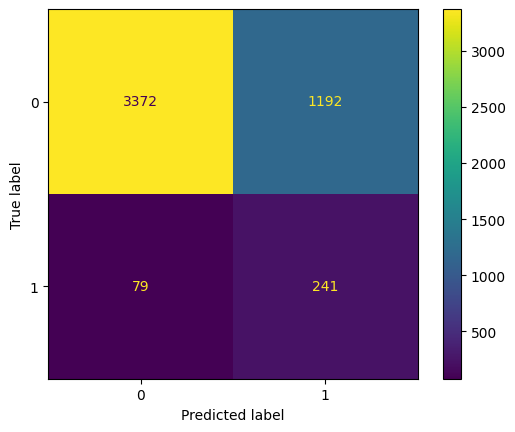



----------------------------


Classification Report


              precision    recall  f1-score   support

           0       0.98      0.74      0.84      4564
           1       0.17      0.75      0.27       320

    accuracy                           0.74      4884
   macro avg       0.57      0.75      0.56      4884
weighted avg       0.92      0.74      0.80      4884



----------------------------


Accuracy Score


Test Accuracy of GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=(150, 100, 50),
                                     max_iter=300),
             n_jobs=-1,
             param_grid={'activation': ['tanh'], 'alpha': [0.05],
                         'hidden_layer_sizes': [(150, 100, 50), (120, 80, 40),
                                                (100, 50, 30)],
                         'learning_rate': ['adaptive'], 'max_iter': [80],
                         'solver': ['adam']})  : 0.7398


----------------------------


AUC SCORE:

In [ ]:
ML(grid)

Train Score: 0.7403019132876952
Test Score: 0.740990990990991


----------------------------


Confusion Matrix




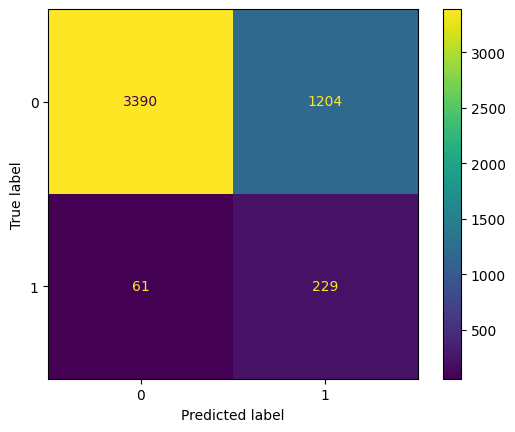



----------------------------


Classification Report


              precision    recall  f1-score   support

           0       0.98      0.74      0.84      4594
           1       0.16      0.79      0.27       290

    accuracy                           0.74      4884
   macro avg       0.57      0.76      0.55      4884
weighted avg       0.93      0.74      0.81      4884



----------------------------


Accuracy Score


Test Accuracy of MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)  : 0.741


----------------------------


AUC SCORE:  0.5979895123276503


In [ ]:
ML(NNClf)

# Mosel with best AUC SCORE metric is Decision Tree

# Let us predict test uknown values using best Decision Tree model

In [ ]:
test.head(3)

,text
0,j jim whitehead ejw cse ucsc edu writes j you ...
1,original message from bitbitch magnesium net p...
2,java for managers vince durasoft who just taug...


In [ ]:
test.shape

(4070, 1)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4070 entries, 0 to 4069
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4070 non-null   object
dtypes: object(1)
memory usage: 31.9+ KB


In [ ]:
#Checking for missing values
test.isnull().sum()

text    0
dtype: int64

In [ ]:
test.head(3)

,text
0,1869
1,2545
2,1873


In [ ]:
#Scaling test data columns
test_scaled = pd.DataFrame(scaler.fit_transform(test), columns = test.columns)

##### Our test data is now ready for prediction

In [ ]:
Y = decision_tree.predict(test_scaled)

In [ ]:
Y

array([0, 1, 0, ..., 0, 0, 0])

#### Our Predictions

In [ ]:
#converting our predictions to dataframe
df_Y = pd.DataFrame(Y, columns= ['text_type'])
mapping = {1:"spam", 0:'ham'}
df_Y.applymap(lambda s: mapping.get(s) if s in mapping else s)

,text_type
0,ham
1,spam
2,ham
3,ham
4,spam
...,...
4065,ham
4066,spam
4067,ham
4068,ham


In [ ]:
#Confusion Matrix
print('Confusion Matrix')
print('\n')
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)
preds = decision_tree.predict(test_X)
cm = confusion_matrix(preds, test_y)
df_cm = pd.DataFrame(cm)
df_cm.to_csv('confusion_matrix.csv')

Confusion Matrix


